**1.5	Desarrollar una función propia de predicción para una nueva imagen que puede venir en UNA de las siguientes formas: b.	Una imagen nueva indicando el PATH**

*Predicción de nuevos samples (nuevos imagenes)*

In [ ]:
!pip install --upgrade keras

In [ ]:
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
modeloOptimizado = load_model('/content/modeloRedNeuronalOptimizado.h5')
print("Red Neuronal Cargada desde Archivo")


Red Neuronal Cargada desde Archivo


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


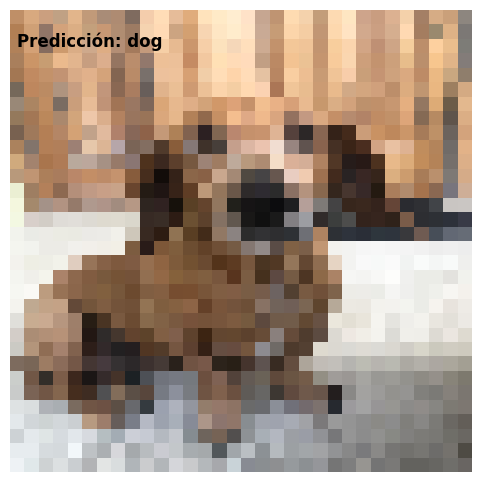

Predicción final: dog (Valor: 1.0000)


In [ ]:
import cv2
image_path = '/content/mia.jpg'  # Reemplaza 'ruta_de_tu_imagen.jpg' con la ruta correcta

# Cargar la imagen desde tu computadora
image = cv2.imread(image_path)

# Asegurarse de que la imagen se haya cargado correctamente
if image is not None:
    # Preprocesar la imagen
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB si es necesario
    image = cv2.resize(image, (32, 32))  # Cambiar el tamaño de la imagen si es necesario
    image = image.reshape(1, -1)

    # Realizar la predicción
    predictions = modeloOptimizado.predict(image)
    predictions = predictions.flatten()

    # Obtener el nombre de las etiquetas
    label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

    # Obtener la clase con el valor más alto como predicción final
    predicted_class_index = predictions.argmax()
    predicted_class_name = label_names[predicted_class_index]
    predicted_class_value = predictions[predicted_class_index]

    # Mostrar la imagen con el resultado en la parte superior
    fig = plt.figure(figsize=(6, 6))
    plt.text(0, 1.05, 'Predicción: {}'.format(predicted_class_name), fontsize=12, weight='bold', ha='left', va='top')
    plt.imshow(image.reshape(32, 32, 3))
    plt.axis('off')
    plt.show()

    print('Predicción final: {} (Valor: {:.4f})'.format(predicted_class_name, predicted_class_value))
else:
    print('No se pudo cargar la imagen desde la ruta especificada.')

**1.6	Conclusiones**
- Primeramente describimos el dataset en el cual hablamos de las diez categorias que tiene (airplane : 0 automobile : 1 bird : 2 cat : 3 deer : 4 dog : 5 frog : 6 horse : 7 ship : 8 truck : 9), ademas recordar que este dataset tiene 60000 imagenes, 50000 para train y 10000 para test, además analizamos sus dimensiones y todos los valores relevantes del dataset.
- En la parte del entrenamiento de la red neuronal base lo que hicimos fue realizar un modelo de 3 capas con neuronas de 32, 64 y 10 neuronas respectivamente, comenzamos con una estructura simple y con los epochs a 10, esto para lograr un mejor resultado del entrenamiento. Asi es como conseguimnos una accurracy del 0.39.
- Luego mostramos los resultados de calidad que viene a ser buenos (Accuracy: 0.4256, Precision:  0.4215, Recall:  0.4256, F1: 0.4194). Adenas de que mostramos la matriz de confusion donde pudimos ver que la mayoria de aciertos en cuanto a reales y prediccion son con los airplane, frog y ship.
-Despues con esos fundamentos, logramos pasar a la optimizacion del modelo de la red neuronal (fine tuning); seguimos con el Paso 1. Parámetros de compilación: batcha size, cantidad de epochs, optimizador, con la ayuda del GridSearch, conseguimnos realizar una gran cantidad de comparacion donde llegamos a la conclusion de que con  batch_size: 300, 'epochs': 20, 'optimizer': 'Adam' llegamos una accurracy del 0.38.
- Aplicando los mejores parametros de compilacion que recien conseguimos a concer pasamod son el Paso 2. Densidad de las capas de neuronas y regularización de Dropout, donde nos muestra que con 'model__dr': 0, 'model__l1': 64, 'model__l2': 64 tenemos un accuracy de 0.42.
-Realizamos comparaciones de ambos modelos y, con la ayuda de tablas y mapas de calor, llegamos a la conclusion que el modelo Optimizado, que junta todos nuestros nuevos valores a los parametros mas revelantes lo usamos para ajustar nuestro nuevo modelo optimizado llegamos a alcanzar un nuevo accuracy de 0.45, tiene una mejora del 0.204%, lo cual puede parecer leve por el momento pero en si demuestra la eficacia de los procedimientos de la optimizacion.
- Por ultimo logramos hacer predicciones, utilizando el modelo Optimizado, de imagenes sacada de una ruta en donde usamos una foto de una perrita y la prediccion acertó con que era un perro.
- A lo largo de la practica llegamos tambien a conclusiones tambien en como se podria mejor estos procesos de optimizacion de una red neuronal, tratar de trabajar con un batch de imagenes primero para que podamos realizar las ejecuciones y pruebas de manera mas agil, diseñar un modelo con pocas capas y que sea simple para que el gridsearch no comsuma tantos recursos ni tanto tiempo.

**1.7	Referencias**
- CIFAR-10 and CIFAR-100 datasets. (s/f). Toronto.edu. Recuperado de https://www.cs.toronto.edu/~kriz/cifar.html
- OpenCV: OpenCV modules. (s. f.). Recuperado de https://docs.opencv.org/4.x/
- Activation parameter not working in GridSearch. (2022). stackoverflow. Recuperado de https://stackoverflow.com/questions/70250928/activation-parameter-not-working-in-gridsearch#comment126992357_70250928